Importing required Libraries

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Getting CIFAR10 dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


Plotting an image of each class using pyplot

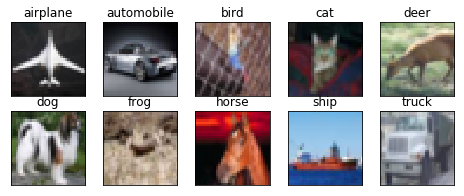

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

Method to plot model history

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

Method to get test accuracy

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Assignment 6A model

In [0]:
# Convolution Block 1
model = Sequential()
model.add(Convolution2D(24, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #32, RF: 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(72, 3, 3, border_mode='same')) #32, RF: 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(144, 3, 3, border_mode='same')) #32, RF: 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


# Transision Block 1

model.add(MaxPooling2D(pool_size=(2, 2))) #16, RF: 14
# model.add(Dropout(0.25))

model.add(Convolution2D(24, 1, 1)) #16, RF: 14
model.add(Activation('relu'))

model.add(Dropout(0.1))

# Convolution Block 2

model.add(Convolution2D(72, 3, 3, border_mode='same'))#16, RF: 16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(72, 3, 3, border_mode='same'))#16, RF: 18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


# Transision Block 2

model.add(MaxPooling2D(pool_size=(2, 2))) #8, RF: 36
# model.add(Dropout(0.25))
model.add(Convolution2D(24, 1, 1)) #8, RF: 36
model.add(Activation('relu'))
model.add(Dropout(0.1))


# Convolution Block 3

model.add(Convolution2D(24, 3, 3, border_mode='same')) #8, RF: 38
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(72, 3, 3, border_mode='same'))#8, RF: 40
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(144, 3, 3, border_mode='same'))#8, RF: 42
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 1, 1)) #8, RF: 42
model.add(Activation('relu'))

model.add(Convolution2D(10, 8, 8)) 


model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(72, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(144, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(72, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(72, (3, 3), padding

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 24)        672       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 24)        96        
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 24)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 72)        15624     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 72)        288       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 72)        0         
__________

### Train the model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 32s 81ms/step - loss: 1.4950 - acc: 0.4536 - val_loss: 1.6120 - val_acc: 0.4861
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 29s 75ms/step - loss: 1.0491 - acc: 0.6256 - val_loss: 1.2479 - val_acc: 0.5811
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 29s 74ms/step - loss: 0.8912 - acc: 0.6832 - val_loss: 1.2006 - val_acc: 0.5790
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 29s 74ms/step - loss: 0.7868 - acc: 0.7227 - val_loss: 0.9153 - val_acc: 0.6694
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 29s 74ms/step - loss: 0.7133 - acc: 0.7494

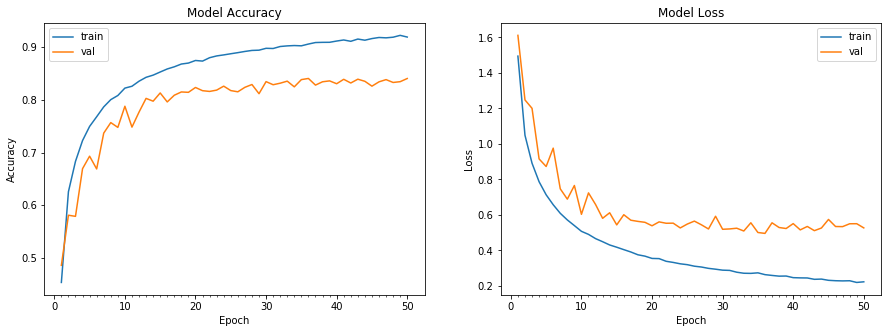

Accuracy on test data is: 84.04


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Model with Group Convolution (Assignment 6B)

In [0]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, SeparableConv2D
from keras.layers.merge import concatenate


# Convolution Block 1

visible = Input(shape=(32,32,3))

conv1 = Convolution2D(24, 3, 3, border_mode='same')(visible) #32x32x24, RF: 3x3
conv1_bn = BatchNormalization()(conv1)
conv1_activation = Activation('relu')(conv1_bn)
conv1_dropout = Dropout(0.1)(conv1_activation)

# Spacially seperated convolution
conv2_3cross1 = Convolution2D(72, 3, 1, border_mode='same')(conv1_dropout) #32x32x72, RF: 5x3
conv2_3cross1_activation = Activation('relu')(conv2_3cross1)
conv2_1cross3 = Convolution2D(72, 1, 3, border_mode='same')(conv2_3cross1_activation) #32x32x72, RF: 5x5
conv2_1cross3_activation =  Activation('relu')(conv2_1cross3)

conv2_bn = BatchNormalization()(conv2_1cross3_activation)
conv2_dropout = Dropout(0.1)(conv2_bn)


# Depthwise Separable Convolution
conv3 = SeparableConv2D(144, (3, 3), border_mode='same')(conv2_dropout) #(32x32)x144, RF: 7x7
conv3_bn = BatchNormalization()(conv3)
conv3_activation = Activation('relu')(conv3_bn)
conv3_dropout = Dropout(0.1)(conv3_activation)


# Transision Block 1

maxpooling1 = MaxPooling2D(pool_size=(2, 2))(conv3_dropout) #16x16x144 , RF: 14x14
pointwise1 = Convolution2D(24, 1, 1)(maxpooling1) #16x16x24, , RF: 14x14
pointwise_activation1 = Activation('relu')(pointwise1)
transision_dropout1 = Dropout(0.1)(pointwise_activation1)


# Convolution Block 2
# Group convolution 1
conv4 = Convolution2D(72, 3, 3, border_mode='same')(transision_dropout1) #16x16x72, RF: 16x16
conv4_bn = BatchNormalization()(conv4)
conv4_activation = Activation('relu')(conv4_bn)
conv4_output = Dropout(0.1)(conv4_activation)

conv5 = Convolution2D(72, 5, 5, border_mode='same')(transision_dropout1) #16x16x72, RF: 18x18
conv5_bn = BatchNormalization()(conv5)
conv5_activation = Activation('relu')(conv5_bn)
conv5_output = Dropout(0.1)(conv5_activation)

merge_conv_4n5 = concatenate([conv4_output, conv5_output]) #16x16x144, RF: RF: 18x18

# Transision Block 2

maxpooling2 = MaxPooling2D(pool_size=(2, 2))(merge_conv_4n5) #8x8x144, RF: 36x36
pointwise2 = Convolution2D(24, 1, 1)(maxpooling2) #8x8x24, RF: 36x36
pointwise_activation2 = Activation('relu')(pointwise2)
transision_dropout2 = Dropout(0.1)(pointwise_activation2)


# Convolution Block 3
# group convolution 2 

conv6 = Convolution2D(24, 3, 3, border_mode='same', dilation_rate=1)(transision_dropout2) #8x8x24, RF: 38x38
conv6_bn = BatchNormalization()(conv6)
conv6_activation = Activation('relu')(conv6_bn)
conv6_output = Dropout(0.1)(conv6_activation)

conv7 = Convolution2D(72, 3, 3, border_mode='same', dilation_rate=1)(transision_dropout2) #8x8x72, RF: 38x38
conv7_bn = BatchNormalization()(conv7)
conv7_activation = Activation('relu')(conv7_bn)
conv7_output = Dropout(0.1)(conv7_activation)

conv8 = Convolution2D(144, 3, 3, border_mode='same', dilation_rate=2)(transision_dropout2) #8x8x144, RF: 40x40
conv8_bn = BatchNormalization()(conv8)
conv8_activation = Activation('relu')(conv8_bn)
conv8_output = Dropout(0.1)(conv8_activation)

merge_conv_6n7 = concatenate([conv6_output, conv7_output, conv8_output]) #8x8x240, RF: 40x40

pointwise_conv = Convolution2D(10, 1, 1)(merge_conv_6n7) #8x8x10, RF: 40x40
pointwise_activation = Activation('relu')(pointwise_conv)

last_layer = Convolution2D(10, 8, 8)(pointwise_activation) #1x1x10

flat = Flatten()(last_layer)
output = Activation('softmax')(flat)

model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(72, (3, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(72, (1, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(144, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(72, (3, 3), padding="same")`
/usr/lo

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_71 (Conv2D)              (None, 32, 32, 24)   672         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_43 (BatchNo (None, 32, 32, 24)   96          conv2d_71[0][0]                  
__________________________________________________________________________________________________
activation_78 (Activation)      (None, 32, 32, 24)   0           batch_normalization_43[0][0]     
__________________________________________________________________________________________________
dropout_60

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (8, 8))`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

### Train the model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 33s 85ms/step - loss: 1.3929 - acc: 0.4926 - val_loss: 1.5535 - val_acc: 0.4956
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 28s 72ms/step - loss: 0.9463 - acc: 0.6617 - val_loss: 0.8988 - val_acc: 0.6841
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 28s 73ms/step - loss: 0.7906 - acc: 0.7174 - val_loss: 0.9077 - val_acc: 0.6808
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 29s 73ms/step - loss: 0.7055 - acc: 0.7508 - val_loss: 0.9527 - val_acc: 0.6704
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 29s 73ms/step - loss: 0.6469 - acc: 0.7704

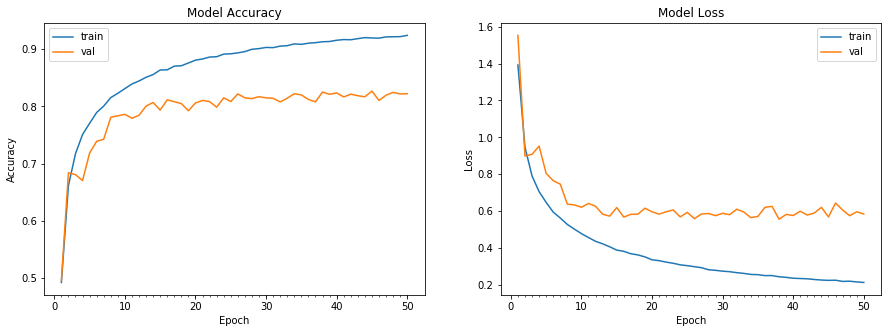

Accuracy on test data is: 82.20


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))